In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
#%matplotlib inline

In [2]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [3]:
data.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

                       count
1    Steven Spielberg     26
2         Woody Allen     22
3      Clint Eastwood     20
4     Martin Scorsese     20
5        Ridley Scott     17
6   Steven Soderbergh     16
7           Spike Lee     16
8          Tim Burton     16
9        Renny Harlin     15
10       Oliver Stone     14


{'whiskers': [<matplotlib.lines.Line2D at 0x19b68855550>,
 'caps': [<matplotlib.lines.Line2D at 0x19b68855bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19b68855280>],
 'medians': [<matplotlib.lines.Line2D at 0x19b688670d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19b688673a0>],
 'means': []}

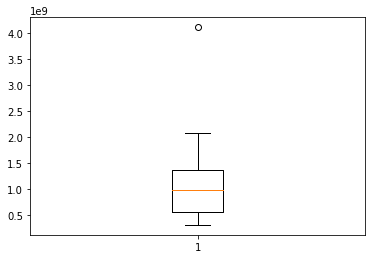

In [4]:
gross_by_director = data.groupby("director_name", as_index=False).agg({"gross":["sum", "count"]})
gross_by_director.columns = gross_by_director.columns.droplevel(0)
top_10 = gross_by_director.sort_values("count", ascending=False).reset_index(drop=True)[1:11]
print(top_10[['', 'count']])
plt.boxplot(top_10["sum"])

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

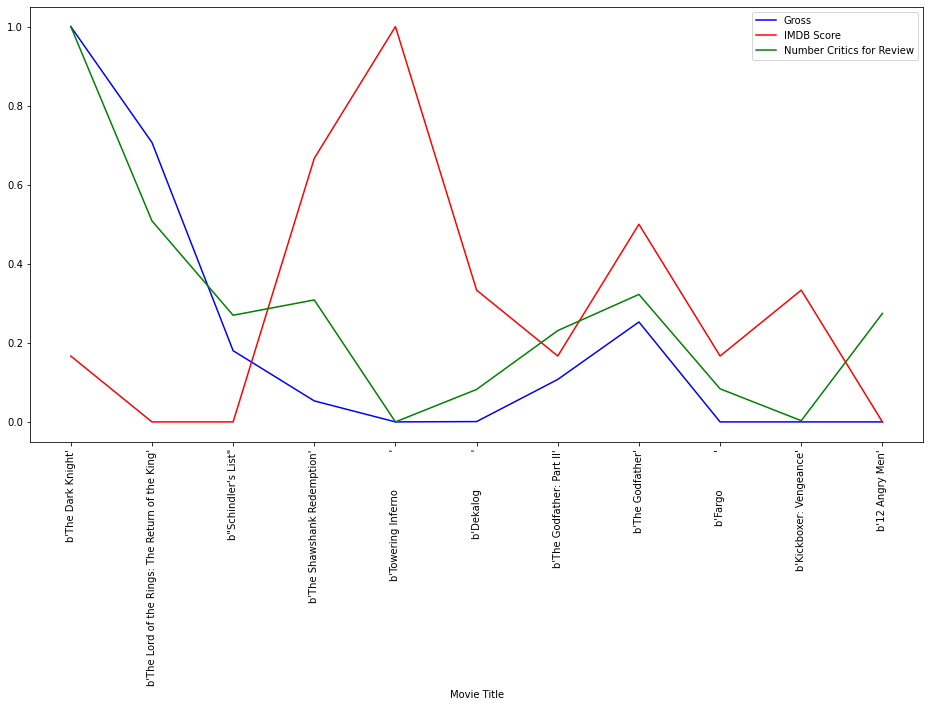

In [6]:
#Since there are numerous data, I have decided to only look at the top 10 move with the highest imdb_score 
#and place the normalized values of imdb_score, gross, and num_critic_for_reviews to compare them

top_scores = data.groupby("movie_title", as_index=False).mean().sort_values("imdb_score", ascending=False)["movie_title"][:11].tolist()
top_scores_data = data[data["movie_title"].isin(top_scores)].reset_index(drop=True)
top_scores_data.drop([7], axis=0, inplace=True)
for x in top_scores_data.columns:
    if top_scores_data[x].dtype == float or top_scores_data[x].dtype == int:
        max = top_scores_data[x].max()
        min = top_scores_data[x].min()
        top_scores_data[x] = (top_scores_data[x] - min) / (max-min)

plt.figure(figsize=(16,8))
plt.plot(top_scores_data.movie_title, top_scores_data.gross, label = "Gross", color="blue")
plt.plot(top_scores_data.movie_title, top_scores_data.imdb_score, label = "IMDB Score", color="red")
plt.plot(top_scores_data.movie_title, top_scores_data.num_critic_for_reviews, label = "Number Critics for Review", color="green")
plt.xlabel("Movie Title")
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [7]:
data["sales"] = data["gross"]-data["budget"]
data.head(5)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0


## Which directors garnered the most total sales?

In [8]:
sales_by_director = data.groupby("director_name", as_index=False).sum().sort_values("sales", ascending=False).reset_index(drop=True)
sales_by_director.director_name.head(10)

0     Steven Spielberg
1         George Lucas
2        James Cameron
3          Joss Whedon
4       Chris Columbus
5        Peter Jackson
6           Tim Burton
7    Christopher Nolan
8          Jon Favreau
9     Francis Lawrence
Name: director_name, dtype: object

## Plot sales and average likes as a scatterplot. Fit it with a line.

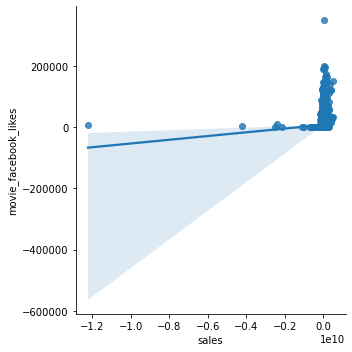

In [9]:
sns.lmplot(x='sales',y='movie_facebook_likes',data=data,fit_reg=True) 

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

In [10]:
data["genres"] = data["genres"].apply(lambda x: re.split("\|",x))
data.genres[:10]

0                 [Action, Adventure, Fantasy, Sci-Fi]
1                         [Action, Adventure, Fantasy]
2                        [Action, Adventure, Thriller]
3                                   [Action, Thriller]
4                                        [Documentary]
5                          [Action, Adventure, Sci-Fi]
6                         [Action, Adventure, Romance]
7    [Adventure, Animation, Comedy, Family, Fantasy...
8                          [Action, Adventure, Sci-Fi]
9                [Adventure, Family, Fantasy, Mystery]
Name: genres, dtype: object

In [11]:
data["Romance"] = data['genres'].apply(lambda x: True if 'Romance' in x  else False)
data["Comedy"] = data['genres'].apply(lambda x: True if 'Comedy' in x else False)
data["Action"] = data['genres'].apply(lambda x: True if 'Action' in x else False)
data["Fantasy"] = data['genres'].apply(lambda x: True if 'Fantasy' in x else False)

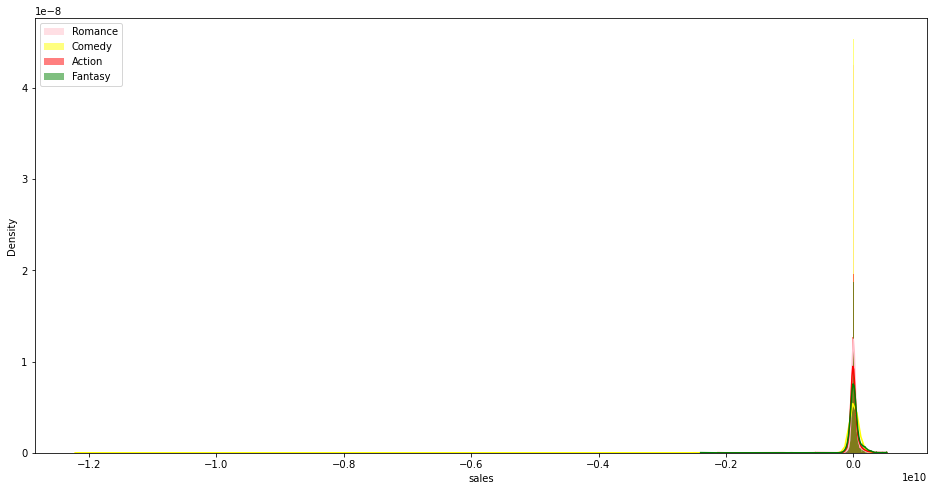

In [12]:
plt.figure(figsize = (16,8))
ax = sns.histplot(data[data["Romance"] == True]["sales"], color="pink", label="Romance", kde=True, stat="density", linewidth=0)
sns.histplot(data[data["Comedy"] == True]["sales"], color="yellow", label="Comedy", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data["Action"] == True]["sales"], color="red", label="Action", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data["Fantasy"] == True]["sales"], color="green", label="Fantasy", kde=True, stat="density", linewidth=0, ax=ax)
ax.legend()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [13]:
data["average_actor_likes"] = data[["actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes"]].mean(axis=1)
data["average_actor_likes"]

0         930.333333
1       15333.333333
2        3851.333333
3       24333.333333
4          47.666667
            ...     
5039      584.333333
5040        0.000000
5041      718.000000
5042       41.666667
5043        0.000000
Name: average_actor_likes, Length: 5044, dtype: float64

## Copying the whole dataframe

In [14]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,Romance,Comedy,Action,Fantasy,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,936.0,7.9,1.78,33000.0,523505847.0,False,False,True,True,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,5000.0,7.1,2.35,0.0,9404152.0,False,False,True,True,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,393.0,6.8,2.35,85000.0,-44925825.0,False,False,True,False,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,23000.0,8.5,2.35,164000.0,198130642.0,False,False,True,False,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,12.0,7.1,0.00,0.0,0.0,False,False,False,False,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [15]:
for x in df.columns:
    if df[x].dtype == float or df[x].dtype == int:
        max = df[x].max()
        min = df[x].min()
        df[x] = (df[x] - min) / (max-min)

In [16]:
df.head(10)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,Romance,Comedy,Action,Fantasy,average_actor_likes
0,0,b'Avatar',Color,James Cameron,0.889299,0.941799,0.000000,0.037174,Joel David Moore,0.001563,...,0.006832,0.831579,0.111250,0.094556,1.000000,False,False,True,True,0.004261
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,0.371464,0.894180,0.024478,0.043478,Orlando Bloom,0.062500,...,0.036496,0.747368,0.146875,0.000000,0.959637,False,False,True,True,0.070229
2,2,b'Spectre',Color,Sam Mendes,0.740467,0.783069,0.000000,0.007000,Rory Kinnear,0.017188,...,0.002869,0.715789,0.146875,0.243553,0.955371,False,False,True,False,0.017640
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,1.000000,0.867725,0.956522,1.000000,Christian Bale,0.042188,...,0.167883,0.894737,0.146875,0.469914,0.974454,False,False,True,False,0.111450
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.000000,0.000000,0.005696,0.000000,Rob Walker,0.000205,...,0.000088,0.747368,0.000000,0.000000,0.958898,False,False,False,False,0.000218
5,5,b'John Carter',Color,Andrew Stanton,0.568266,0.698413,0.020652,0.023043,Samantha Morton,0.001000,...,0.004613,0.694737,0.146875,0.068768,0.943930,False,False,True,False,0.002751
6,6,b'Spider-Man 3',Color,Sam Raimi,0.482165,0.825397,0.000000,0.173913,James Franco,0.037500,...,0.080292,0.652632,0.146875,0.000000,0.965064,True,False,True,False,0.059542
7,7,b'Tangled',Color,Nathan Greno,0.398524,0.529101,0.000652,0.012348,Donna Murphy,0.001248,...,0.004036,0.821053,0.115625,0.083095,0.954251,True,True,False,True,0.002498
8,8,b'Avengers: Age of Ultron',Color,Joss Whedon,0.781058,0.746032,0.000000,0.826087,Robert Downey Jr.,0.040625,...,0.153285,0.789474,0.146875,0.338109,0.975307,False,False,True,False,0.100763
9,9,b'Harry Potter and the Half-Blood Prince',Color,David Yates,0.461255,0.809524,0.012261,0.434783,Daniel Radcliffe,0.039062,...,0.080292,0.789474,0.146875,0.028653,0.962977,False,False,False,True,0.070229
